# ECS7024 Statistics for Artificial Intelligence and Data Science

# Coursework 3

## Contents Page

The aim of this report is to analyse English Property Prices over 36 months in different areas of the country. In this report, we will be identifying trends over the time period in properties and also analysing whether price changes affect regions similarly.

1. Section 1: Introduction
  * Section 1.1: Outline
  * Section 1.2: Loading the Data
2. Section 2: Data Preparation
  * Section 2.1: Seperating the region and area
  * Section 2.2: Assigning a Region to the Areas
  * Section 2.3: Handling missing values
3. Section 3: Trends 
  * Section 3.1: Region Dataframe for trends
  * Section 3.2: Plotting visualisations of the trends
  * Section 3.3: Commenting on the trends
4. Section 4: Price Changes Calculation
  * Section 4.1: Calculating the change in the price of flats in each area 
  * Section 4.2: Visualising the change in area prices in each region
  * Section 4.3: Commenting on the results
5. Section 5: Statistical Analysis
  * Section 5.1: Cross Tabulation
  * Section 5.2: Chi-square test
  * Section 5.3: Interpretation of results

## Section 1: Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Section 1.1: Outline

Section 1 is the intro which loads the data. Section 2 we begin data preparation. Section 3 we analyse the trends in prices. In Section 4 we calculate the price changes, Section 5 we carry out statistical analysis and hypothesis testing.

### Section 1.2: Loading the data
The data is loaded from a CSV file. 

In [2]:
prices = pd.read_csv('average-property-price.csv')
prices

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795
...,...,...,...,...,...,...,...
5755,01/04/2019,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
5756,01/05/2019,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
5757,01/06/2019,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830
5758,01/07/2019,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990


In [3]:
prices = prices.assign(Month = pd.to_datetime(
 prices['Date'], dayfirst=True)).drop(labels='Date', axis=1)
location = pd.read_csv('location-codes.csv')

prices

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


## Section 2: Data Preparation

In this section we prepare the data for exploratory analysis. We clean the data and condense it to allow it to be interpreted more smoothly. Tasks such as merging columns and handling missing values.

### Section 2.1: Seperating the Region and Area
We need to seperate the region and area data as this may contain duplicates in our analysis. For example Tower Hamlets is in London and they are both in the same dataframe column. 

In [4]:
#Region data frame
prices_region = prices.loc[(prices.Code == 'E12000001')|(prices.Code == 'E12000002')|(prices.Code == 'E12000003')|
                        (prices.Code == 'E12000004')|(prices.Code == 'E12000005')|(prices.Code == 'E12000006')|
                        (prices.Code == 'E12000007')| (prices.Code == 'E12000008')| (prices.Code == 'E12000009')]

prices_region['Area'].value_counts()

#Area data frame by dropping all rows of index with Region DF
prices_area = prices.drop(prices_region.index) 

prices_area
# prices_region[(prices_region.Area == 'London')]

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


### Section 2.2: Assigning a Region to the Areas
We use the location code data to properly make use of the region data which was originally mixed with our area data. After seperating the two, we assign the areas to there respective regions. We ensure all areas are assigned to a region.

In [5]:
location
location_2 = location[['AuthorityCode','AuthorityName','RegionName',]]
location_2 = location_2.rename(columns={'AuthorityCode': 'Code','AuthorityName':'Area'})
location_2

,Code,Area,RegionName
0,E06000001,Hartlepool,North East
1,E06000002,Middlesbrough,North East
2,E06000003,Redcar and Cleveland,North East
3,E06000004,Stockton-on-Tees,North East
4,E06000005,Darlington,North East
...,...,...,...
149,E10000029,Suffolk,East of England
150,E10000030,Surrey,South East
151,E10000031,Warwickshire,West Midlands
152,E10000032,West Sussex,South East


In [6]:
# Merging dataframes
prop_prices = pd.merge(prices_area,location_2)
prop_prices

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionName
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,North East
...,...,...,...,...,...,...,...,...
5071,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01,West Midlands
5072,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01,West Midlands
5073,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01,West Midlands
5074,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01,West Midlands


### Section 2.3: Handling missing values
We need to deal with missing values as this will cause problems later on for our exploratory analysis. We need to decide what's the best course of action for the missing values and what they mean in this case, which likely means the area doesn't contain this type of property.

In [7]:
prop_prices[prop_prices.isnull().any(axis=1)]
prop_prices.loc[(prop_prices.Area== 'City of London')]
prop_prices_original = prop_prices.copy()

prop_prices = prop_prices.dropna()
prop_prices

,Area,Code,Detached,Semi,Terraced,Flat,Month,RegionName
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,North East
...,...,...,...,...,...,...,...,...
5071,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01,West Midlands
5072,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01,West Midlands
5073,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01,West Midlands
5074,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01,West Midlands


#### Null values

We will drop all the detached and semi rows for City of London as there is no basis for either column in city of london to take an average from.Every single value for these columns are missing and most likely means that there isn't any detached or semi detached houses in this area. We will drop all these values of missing values as it is such a small proportion of the total dataset it won't affect results, whereas the NaN are affecting our analysis espically for later on. City of London is also a very small area in London so dropping these rows doesn't influence the overall picture much either. These values are redundant to our analysis. 

London is a region with over 1000 rows so losing only 35 rows of data for this region will not affect results or our analysis. This shows how small a proportion the missing values contribute to our sample and we still have a large one after we drop these values so I think it is best to remove the missing values as we can't be sure what they should have been and a mean is guessing in this case may not be accurate. An alternative is to change all the nulls to 0 or use the mean of the column, however these methods are inapproriate in this scenario as we can not accurately estimate the mean price of a property which is likely very rare in this area if any at all. Above the revised table shows the omitted null value data as we drop the rows.

## Section 3: Trends
We look at some trends of the properties and regions over the 36 month period and what this means 


### Section 3.1: Region Dataframe for trends
We need to tune our new dataframe for the variables we want to take a closer look at. We drop the columns of the 'redundant' variables to our analysis to make sure they don't show up on any of our plots or conflict with them. It also creates clarity in what exactly is being looked at

In [8]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns

prop_prices_2 = prop_prices.drop(['Terraced','Semi'],axis=1)

def makeTime(row):
    return pd.Timestamp(row.Month)

prop_prices_2 = prop_prices_2.assign(Time = prop_prices_2.apply(makeTime, axis=1))
prop_prices_2 = prop_prices_2.drop(labels=['Month'],axis=1)
prop_prices_2 = prop_prices_2.set_index(keys='Time')

prop_prices_2

,Area,Code,Detached,Flat,RegionName
Time,,,,,
2016-09-01,Hartlepool,E06000001,179323.3934,62078.20672,North East
2016-10-01,Hartlepool,E06000001,178880.9745,61893.84174,North East
2016-11-01,Hartlepool,E06000001,179855.0608,61909.33647,North East
2016-12-01,Hartlepool,E06000001,182847.8194,62919.44401,North East
2017-01-01,Hartlepool,E06000001,177454.1433,60770.80795,North East
...,...,...,...,...,...
2019-04-01,Worcestershire,E10000034,367609.8101,129009.66830,West Midlands
2019-05-01,Worcestershire,E10000034,365271.8235,128117.93010,West Midlands
2019-06-01,Worcestershire,E10000034,369772.6445,129593.06920,West Midlands


### Section 3.2: Plotting visualisations of the trends
The visualisations of the trends help us to clearly explain and show what the meaning of the data. We can start to draw insights from the data and build our hypothesis

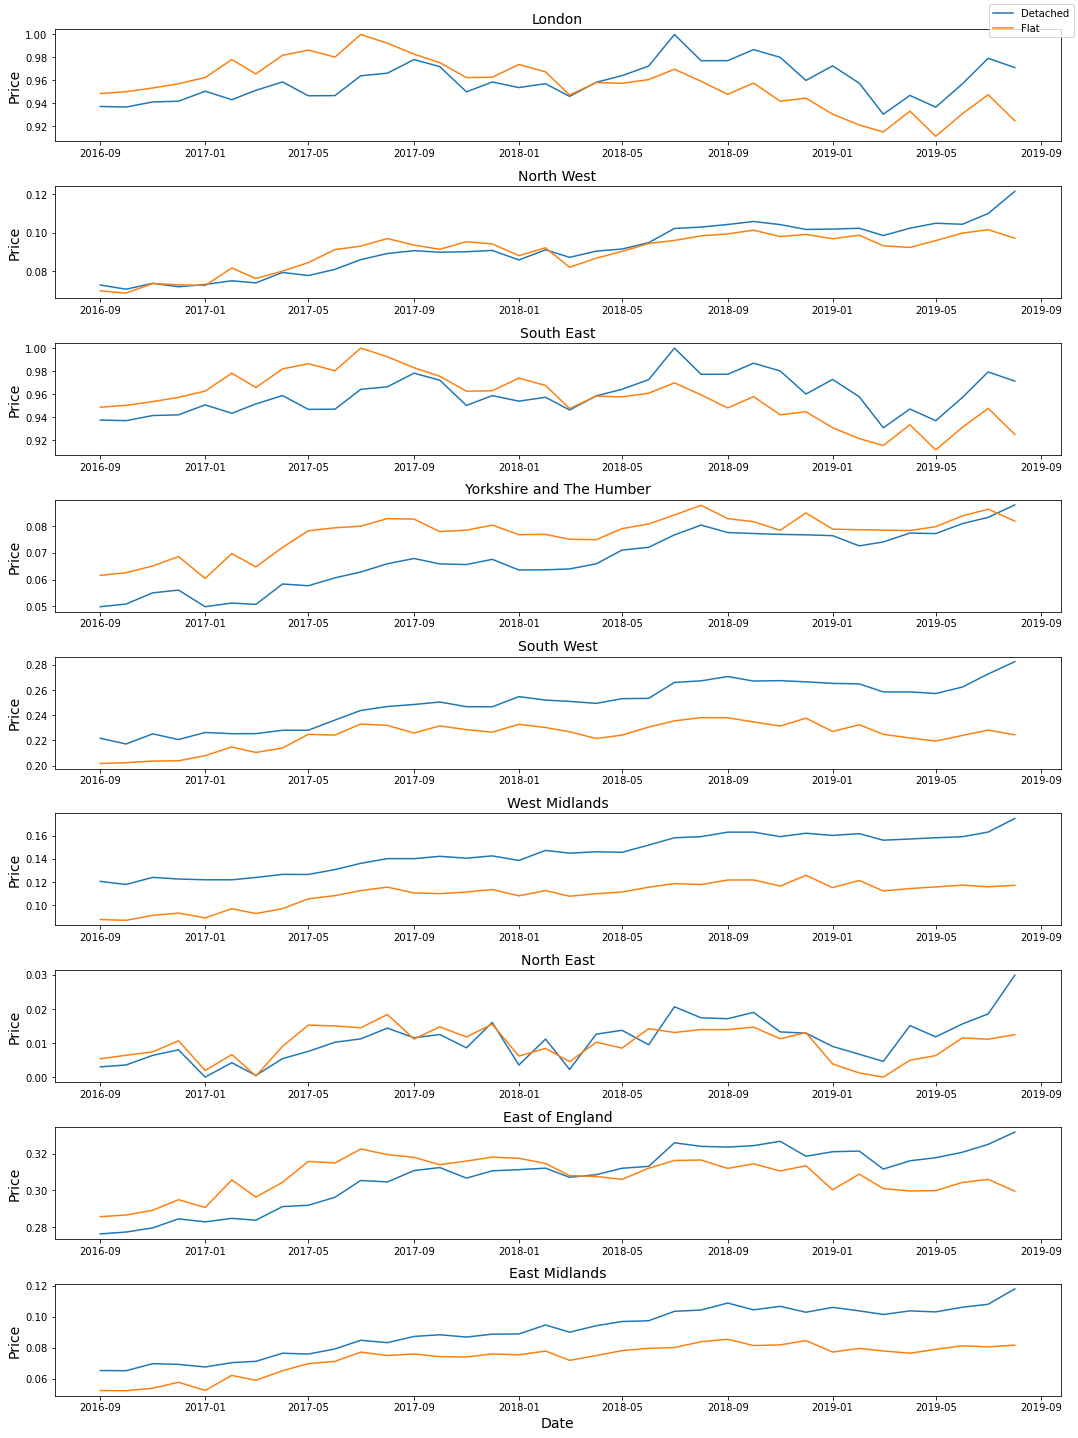

In [9]:
region_data = prices_region.drop(['Semi','Terraced'],axis=1)

def makeTime(row):
    return pd.Timestamp(row.Month)

region_data = region_data.assign(Time = region_data.apply(makeTime, axis=1))
region_data = region_data.drop(labels=['Month'],axis=1)
region_data = region_data.set_index(keys='Time')

scaler = MinMaxScaler()
region_data['Detached_scaled'] = scaler.fit_transform(region_data['Detached'].values.reshape(-1,1))
region_data['Flat_scaled'] = scaler.fit_transform(region_data['Flat'].values.reshape(-1,1))

region_data

london = region_data.loc[region_data.Area == 'London']
north_west = region_data.loc[region_data.Area=='North West']
south_east = region_data.loc[region_data.Area == 'London']
yorkshire = region_data.loc[region_data.Area == 'Yorkshire and The Humber']
south_west = region_data.loc[region_data.Area == 'South West']
west_midlands = region_data.loc[region_data.Area == 'West Midlands Region']
north_east = region_data.loc[region_data.Area == 'North East']
east_of_england = region_data.loc[region_data.Area == 'East of England']
east_midlands = region_data.loc[region_data.Area == 'East Midlands']

fig, (a1, a2, a3,a4,a5,a6,a7,a8,a9) = plt.subplots(9, 1, figsize=(15, 20))
a1.set_title('September 1st 2016 to August 1st 2019')
a1.plot(london[['Detached_scaled','Flat_scaled']])
a1.set_ylabel('Price', fontsize=14)
a2.plot(north_west[['Detached_scaled','Flat_scaled']])
a2.set_ylabel('Price', fontsize=14)
a3.plot(south_east[['Detached_scaled','Flat_scaled']])
a3.set_ylabel('Price', fontsize=14)
a4.plot(yorkshire[['Detached_scaled','Flat_scaled']])
a4.set_ylabel('Price', fontsize=14)
a5.plot(south_west[['Detached_scaled','Flat_scaled']])
a5.set_ylabel('Price', fontsize=14)
a6.plot(west_midlands[['Detached_scaled','Flat_scaled']])
a6.set_ylabel('Price', fontsize=14)
a7.plot(north_east[['Detached_scaled','Flat_scaled']])
a7.set_ylabel('Price', fontsize=14)
a8.plot(east_of_england[['Detached_scaled','Flat_scaled']])
a8.set_ylabel('Price', fontsize=14)
a9.plot(east_midlands[['Detached_scaled','Flat_scaled']])
a9.set_ylabel('Price', fontsize=14)
_ = a9.set_xlabel('Date',fontsize=14)

a1.set_title('London',fontsize=14)
a2.set_title('North West',fontsize=14)
a3.set_title('South East',fontsize=14)
a4.set_title('Yorkshire and The Humber',fontsize=14)
a5.set_title('South West',fontsize=14)
a6.set_title('West Midlands',fontsize=14)
a7.set_title('North East',fontsize=14)
a8.set_title('East of England',fontsize=14)
a9.set_title('East Midlands',fontsize=14)

fig.legend(region_data[['Detached','Flat']],loc='upper right')
fig.tight_layout()

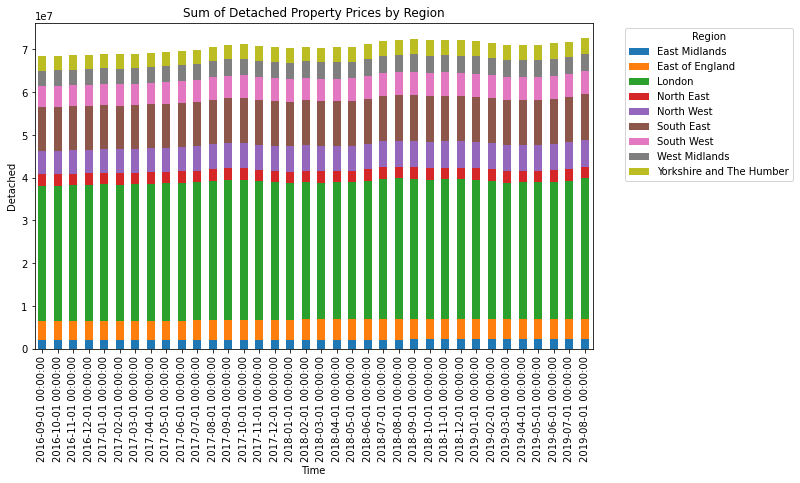

In [10]:
# use groupby on df
dfg = prop_prices_2.groupby(['Time','RegionName'])['Detached'].sum().reset_index()
dfp = dfg.pivot(index='Time', columns='RegionName', values='Detached')

# plot the pivoted dataframe
dfp.plot.bar(stacked=True, figsize=(10, 6), ylabel='Detached', xlabel='Time',
             title='Sum of Detached Property Prices by Region')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Section 3.3: Commenting on the trends

The time series line graphs for each region show us how the price has fluctuated over the 36 month period. We can draw insights such as how the price reacts in certain seasons from the graphs. We can also compare the differences between flat and detached prices. One trend we can see straight away is that on average London has the highest house prices for both flats and detached, although flats seem to be trending downward in London which doesn't seem to be the norm across the other regions.

Another fairly clear pattern is that property prices for flats and detached seem to be trending upwards for every region over time. So from 2016 to 2019 we can see a relatively large increase in prices for properties for both flats and detached. They are both higher than there starting values in the time series at 2016 which shows house prices are trending upwards, however detached houses are still in the lead.The stacked bar chart shows the steady increase in prices in each region for detached houses over time is trending upwards.

Another trend we can see is that house prices for both flats and detached seem to be at their lowest during the start of the year. Janauary seems to have a drop on the curve almost every year over the 36 months. This could be down to janaury and new year sales. Although house prices are trending upwards over the time period, we can see every january it takes a drop then a rebound.

From the above plots we can see that detached properties tend to be more expensive than flats on average over the 36 months and especially towards the end of the time period in 2019 the detached houses are almost all higher than the flat prices for every region. However a pattern which emerges from the visualisation is that it seems in january 2018 flat prices seem to be higher in nearly every region. This could be due to an external event happening in that time.

## Section 4: Price Changes Calculation
We take a deeper look at the actual numbers behind how flat prices have changed

### Section 4.1: Calculating the change in the price of flats in each area

In [11]:
def makeTime(row):
    return pd.Timestamp(row.Month)

prop_prices_original = prop_prices_original.assign(Time = prop_prices_original.apply(makeTime, axis=1))
prop_prices_original = prop_prices_original.drop(labels=['Month'],axis=1)
prop_prices_original = prop_prices_original.set_index(keys='Time')

In [12]:
prop_prices_3 = prop_prices_original

In [13]:
flats_df = prop_prices_3.drop(['Detached','Code','Semi','Terraced'],axis=1)
flats_df = flats_df.sort_values(by=['RegionName','Area'])

flats_df

flats_2017 = flats_df.loc['2017-07-01']
flats_2017

flats_2018 = flats_df.loc['2018-07-01']

flats_2017i = flats_2017.groupby(['Area','RegionName'],as_index=False).sum()
flats_2017i

flats_2018i = flats_2018.groupby(['Area','RegionName'],as_index=False).sum()
flats_2018i

# display(flats_2017)
# flats_2018

july_prices = pd.merge(flats_2017i,flats_2018i, right_index=True,left_index=True)
july_prices

july_prices = (july_prices
               .rename(columns = {"Area_x":'Area','RegionName_x':'RegionName',"Flat_x": "Flat_2017"
                                           ,"Flat_y":"Flat_2018"})
               .drop(["Area_y","RegionName_y"],axis=1))

change_in_price = july_prices['Flat_2018']-july_prices['Flat_2017']
july_prices['Price_change'] = change_in_price

july_prices

,Area,RegionName,Flat_2017,Flat_2018,Price_change
0,Barking and Dagenham,London,233026.92790,230318.11740,-2708.81050
1,Barnet,London,403492.77130,393139.28910,-10353.48220
2,Barnsley,Yorkshire and The Humber,73054.06885,75808.74698,2754.67813
3,Bath and North East Somerset,South West,242441.16080,247866.66800,5425.50720
4,Bedford,East of England,167562.35620,169497.10010,1934.74390
...,...,...,...,...,...
136,Wirral,North West,102486.68380,103254.08380,767.40000
137,Wokingham,South East,233806.26640,228119.70330,-5686.56310
138,Wolverhampton,West Midlands,81530.88640,84689.21896,3158.33256
139,Worcestershire,West Midlands,127758.55150,127751.56660,-6.98490


### Section 4.2: Visualising the change in area prices in each region

In [14]:
gby_Region_2 = july_prices.groupby('RegionName')

London_july = (gby_Region_2
          .get_group('London')
          .sort_values(by='Price_change'))

North_West_july = (gby_Region_2
          .get_group('North West')
          .sort_values(by='Price_change'))

South_East_july = (gby_Region_2
              .get_group('South East')
              .sort_values(by='Price_change'))

Yorkshire_july = (gby_Region_2
          .get_group('Yorkshire and The Humber')
          .sort_values(by='Price_change'))

South_West_july = (gby_Region_2
          .get_group('South West')
          .sort_values(by='Price_change'))

West_Mid_july = (gby_Region_2
          .get_group('West Midlands')
          .sort_values(by='Price_change'))

North_East_july = (gby_Region_2
          .get_group('North East')
          .sort_values(by='Price_change'))

East_Eng_july = (gby_Region_2
          .get_group('East of England')
          .sort_values(by='Price_change'))

East_Mid_july = (gby_Region_2
          .get_group('East Midlands')
          .sort_values(by='Price_change'))

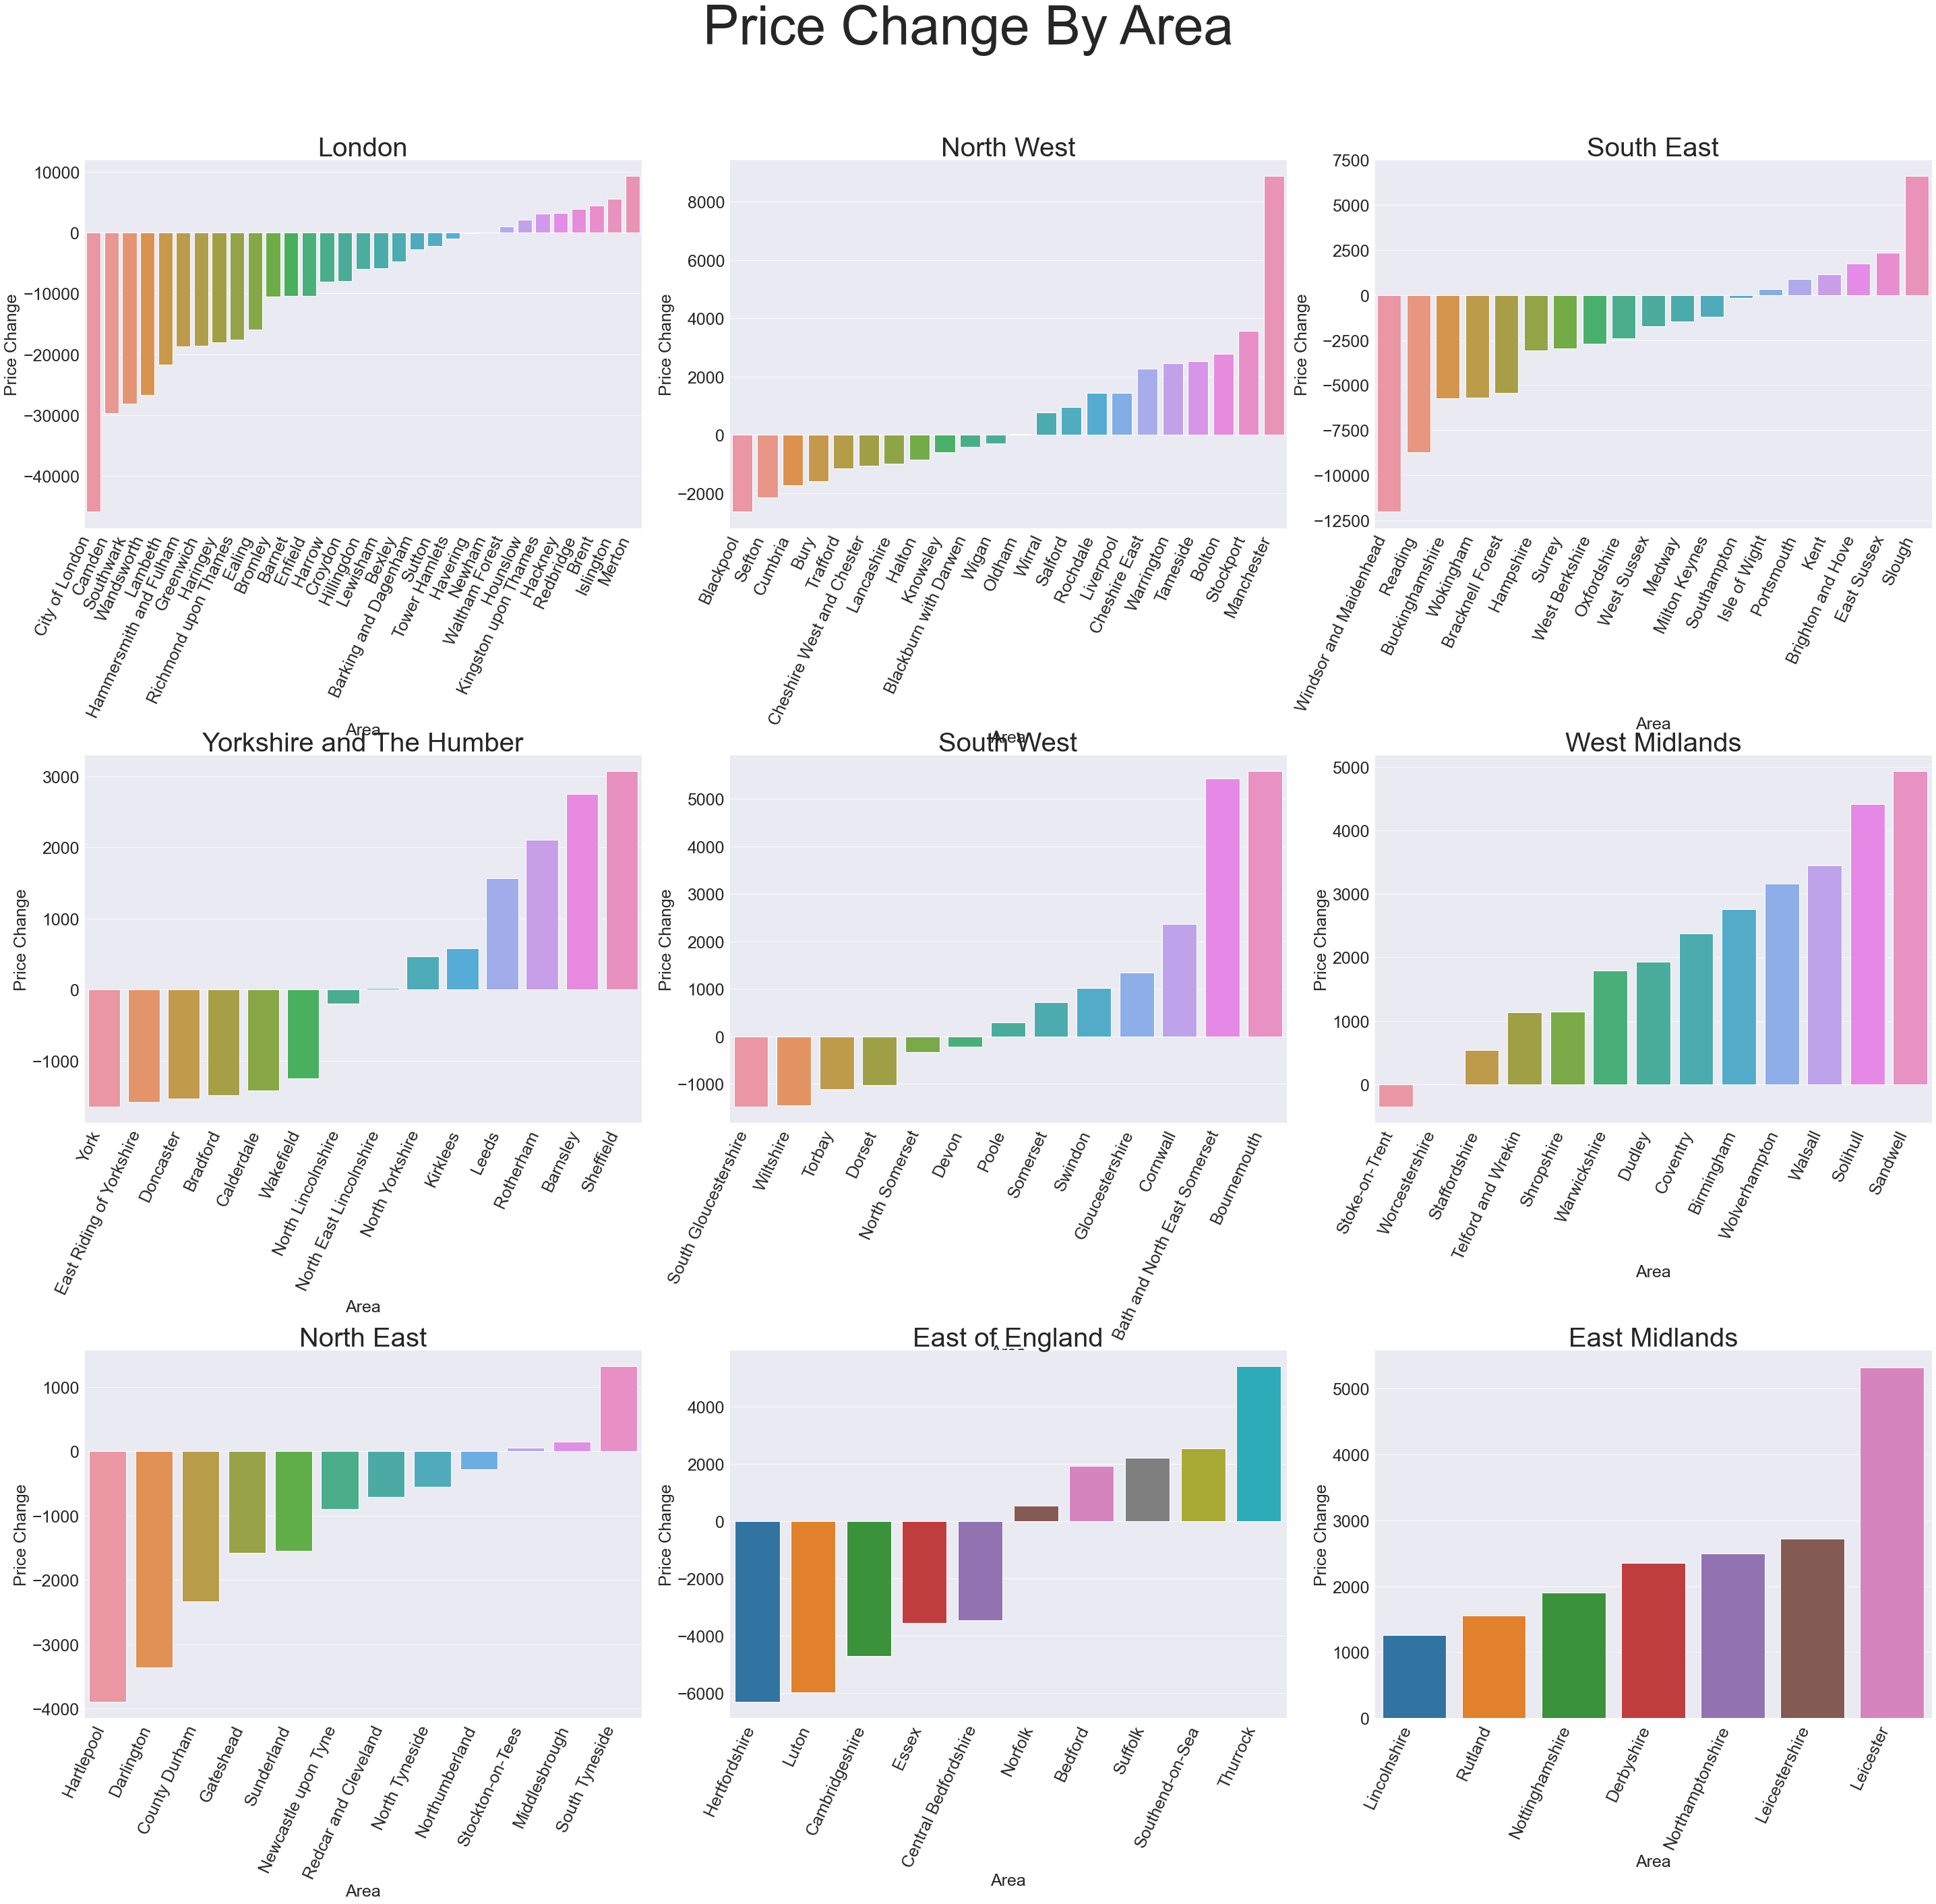

In [15]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(3, 3, figsize=(40, 40))
fig.suptitle('Price Change By Area',fontsize=80)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


ax1 = sns.barplot(ax=axes[0, 0], data=London_july, x='Area',y='Price_change')

ax2 =sns.barplot(ax=axes[0, 1], data=North_West_july, x='Area',y='Price_change')

ax3 = sns.barplot(ax=axes[0, 2], data=South_East_july, x='Area',y='Price_change')

ax4 =sns.barplot(ax=axes[1, 0], data=Yorkshire_july, x='Area',y='Price_change')

ax5=sns.barplot(ax=axes[1, 1], data=South_West_july, x='Area',y='Price_change')

ax6=sns.barplot(ax=axes[1, 2], data=West_Mid_july, x='Area',y='Price_change')

ax7=sns.barplot(ax=axes[2, 0], data=North_East_july, x='Area',y='Price_change')

ax8=sns.barplot(ax=axes[2, 1], data=East_Eng_july, x='Area',y='Price_change')

ax9=sns.barplot(ax=axes[2, 2], data=East_Mid_july, x='Area',y='Price_change')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=65,horizontalalignment='right',fontsize=25)
    plt.yticks(fontsize=25)
    plt.ylabel('Price Change',fontsize=25)
    plt.xlabel('Area',fontsize=25)
    fig.tight_layout()

plt.subplots_adjust(top=0.90)

ax1.set_title('London',fontsize=40)
ax2.set_title('North West',fontsize=40)
ax3.set_title('South East',fontsize=40)
ax4.set_title('Yorkshire and The Humber',fontsize=40)
ax5.set_title('South West',fontsize=40)
ax6.set_title('West Midlands',fontsize=40)
ax7.set_title('North East',fontsize=40)
ax8.set_title('East of England',fontsize=40)
ax9.set_title('East Midlands',fontsize=40)

plt.show()

Text(0.5, 0, 'Area')

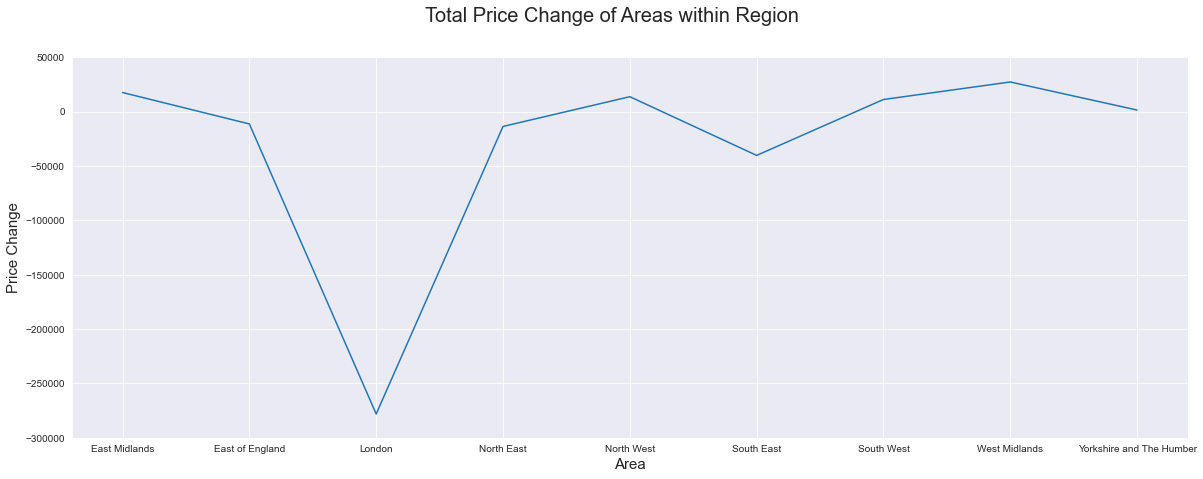

In [16]:
gby_Region_2['Price_change'].sum().plot(kind='line',figsize=(20,7))
fig.tight_layout()
plt.ylim(-300000,50000)
plt.suptitle('Total Price Change of Areas within Region',fontsize=20)
plt.ylabel('Price Change',fontsize=15)
plt.xlabel('Area',fontsize=15)

### Section 4.3: Commenting on the results

The line graph is a visual representation of how each regions flat prices have changed in comparison to each other. This allows us to see and compare the patterns in price change based on every area within a region and then we can compare each region to see whether most areas have a decrease or increase in price from 2017 to 2018. We must take into account that an area with a huge change in price can influence the regions overall sum of price change and these may be outliers as it can paint a inaccurate picture of a regions average change. 

From the bar plots we can see the midlands regions of east and west have grown in area flat prices over this time period, whereas the East regions of north and south seem to have majority decreases in area flat prices. The midlands regions may have increased in price due to factors such as local income increases and it's possible the government is trying to promote development in a low income region. so with the increased living standards comes the increased flat prices. The East regions could possibly have decreased in prices due to less demand for housing or just general fluctuations in the country or local economy.

The bar plots seem to point to a fairly consistent amount of increases and decreases in flat prices across areas and regions with near enough even split over the time period. However we can see London has a huge decrease in every area within the region, leading to a large overall sum of price change decrease. This is further emphasised by the line graph where we can see the general pattern is that the regions tend to either decrease or increase in price within +- £50,000, however London has a steep decrease of over £250,000 in flat prices in this period. This shows the majority of areas within London have a decrease in value from july 2017 to 2018 as evidenced by the bar plots. The bar plots are consistent with the line graph in giving us a wider picture around specific area decreases / increases and there doesn't seem to be any extreme outliers except for possibly city of london area in London region. The other regions fluctuate within reason but Londons extreme drop might point to an event causing this.

## Section 5: Statistical Analysis
In this section we will be investigating whether there is evidence that the change in the price of flats has affected all the regions similarly through chi-squared test 

### Section 5.1: Cross Tabulation

In [17]:
df = july_prices[['Area','RegionName','Price_change']]

def Difference(column):
    if(column.Price_change > 0): return 'Increase'
    if(column.Price_change < 0): return 'Decrease'
    
df.apply(Difference,axis=1)
df = df.assign(Change =df.apply(Difference,axis=1))
df

crosstab = pd.crosstab(index=df.Change,columns=df.RegionName)

crosstab_2 = pd.crosstab(index=df.Change,columns=df.RegionName,margins=True,margins_name='Total')
crosstab_2

RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber,Total
Change,,,,,,,,,,
Decrease,0,5,22,9,11,13,6,2,7,75
Increase,7,5,9,3,11,6,7,11,7,66
Total,7,10,31,12,22,19,13,13,14,141


### Section 5.2: Chi-square test
Chi-squared test is used to determine whether there is a statistically significant difference between the expected frequencies and the observed. This test will tell us whether the price changes are significant (out of the ordinary) from the usual fluctuations or expected observations. 

In [18]:
import scipy.stats as stats

test_stat, p_value, dof, expected = stats.chi2_contingency(crosstab, correction=False)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))

There are 8 degrees of freedom
The chi-squared test statistic is 23.86
The p-value is 0.242 %


In [19]:
crosstab - expected.round(1)

RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,-3.7,-0.3,5.5,2.6,-0.7,2.9,-0.9,-4.9,-0.4
Increase,3.7,0.3,-5.5,-2.6,0.7,-2.9,0.9,4.9,0.4


### Section 5.3: Interpretation of results

The hypothesis test we carry out using the chi-square test can be defined as: Is there evidence that the change in the price of flats has affected all the regions similarly?

The chi squared test statistic is significant at the 0.001 significance level where the chi-squared value needed to reject the null hypothesis is 20.09 using the chi squared tables and the p value of 0.242. The chi-squared test statistic is 23.86 which signifies an effect as it is larger than the value at 0.1% significance and 8 degrees of freedom.

This result shows that the change in price of flats may not have affected all the regions similarly as we reject the null hypothesis and conclude that at the 0.1% significance level. We can see from the cross tab totals that this is the case where the increases and decreases in area for each region vary a lot. If the null was to be accepted, we would expect to see mostly increases or decreases across the regions but we can see it varies. Some regions have mainly increases in price and some have mainly decreases which backs up our chi-squared test results with an increase in 66 areas and a decrease in 75 areas. 

The true value minus expected value shows us how many cases were over or under estimated by region under the assumption of uniform proportions and we can see from the the table above there are quite a few fluctuations from waht was expected. This supports the rejection of the null hypothesis.

We can conclude that the chi-squared test result shows we can not determine whether the price change of flats has affected all the regions similarly.